In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__,".."))
using LadderDGA
using OffsetArrays
using LaTeXStrings
using Plots
using Plots.PlotMeasures

  Activating project at `G:\Codes\LadderDGA.jl`


In [2]:
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"));

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 60


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.4356, χLoc_d(1:301) = 0.0644
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24860048983264754 ?=? 0.2500077791504396 ?≈? 0.25000777915043954 ≟ 0.24999903238559407"
│ Local EoM check for the first 5 frequencies: 0.0001, 0.0002, 0.0002, 0.0003, 0.0003  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.001393219705 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000945811931 ≟ 0


DBG: NOT using diagonal terms in λ₀


In [3]:
kintegrate = LadderDGA.kintegrate
KGrid = LadderDGA.KGrid
grid_dimension = LadderDGA.Dispersions.grid_dimension
expandKArr = LadderDGA.Dispersions.expandKArr
gridPoints = LadderDGA.Dispersions.gridPoints
gen_ϵkGrid = LadderDGA.Dispersions.gen_ϵkGrid
grid_type = LadderDGA.Dispersions.grid_type
gen_sampling = LadderDGA.Dispersions.gen_sampling
basis_transform = LadderDGA.Dispersions.basis_transform
gridshape = LadderDGA.Dispersions.gridshape
reduceKArr = LadderDGA.Dispersions.reduceKArr
#ϵ_k_plus_q = LadderDGA.Dispersions.ϵ_k_plus_q
kG = lDGAhelper.kG
wn2 = LadderDGA.iω_array(lDGAhelper) .^ 2
vn  = LadderDGA.iν_array(lDGAhelper);

In [4]:
function ϵ_k_plus_q2(kG::KGrid, q::NTuple)
    if grid_dimension(kG) != length(q)
        throw(ArgumentError("Grid dimension differs from shift dimension!"))
    else
        k_plus_q = map(ki -> ki .+ q, expandKArr(kG, gridPoints(kG))[:])
        return reshape(gen_ϵkGrid(grid_type(kG), k_plus_q, kG.t, kG.tp, kG.tpp), gridshape(kG))
    end
end

ϵ_k_plus_q2 (generic function with 1 method)

In [167]:
sampling = gen_sampling(grid_type(kG), 2, kG.Ns)
kGrid_f = map(v -> basis_transform(grid_type(kG), v), sampling)

10×10 Matrix{Tuple{Float64, Float64}}:
 (-2.51327, -2.51327)   (-2.51327, -1.88496)   …  (-2.51327, 3.14159)
 (-1.88496, -2.51327)   (-1.88496, -1.88496)      (-1.88496, 3.14159)
 (-1.25664, -2.51327)   (-1.25664, -1.88496)      (-1.25664, 3.14159)
 (-0.628319, -2.51327)  (-0.628319, -1.88496)     (-0.628319, 3.14159)
 (0.0, -2.51327)        (0.0, -1.88496)           (0.0, 3.14159)
 (0.628319, -2.51327)   (0.628319, -1.88496)   …  (0.628319, 3.14159)
 (1.25664, -2.51327)    (1.25664, -1.88496)       (1.25664, 3.14159)
 (1.88496, -2.51327)    (1.88496, -1.88496)       (1.88496, 3.14159)
 (2.51327, -2.51327)    (2.51327, -1.88496)       (2.51327, 3.14159)
 (3.14159, -2.51327)    (3.14159, -1.88496)       (3.14159, 3.14159)

In [168]:
qi = 2
q_m = -1 .* kG.kGrid[qi]
q_p = kG.kGrid[qi]

ek_q_0 = ϵ_k_plus_q2(kG, kG.kGrid[1]) 
ek_q_p = ϵ_k_plus_q2(kG, q_p) 
ek_q_m = ϵ_k_plus_q2(kG, q_m);
nk = expandKArr(kG, 2 .* sum(lDGAhelper.gLoc.parent, dims=2)[:,1]/lDGAhelper.mP.β .+ 1);
2 .* sum(lDGAhelper.gLoc, dims=2)[:,-600]/lDGAhelper.mP.β .+ 1;

In [179]:
vn_gl  = LadderDGA.iν_array(lDGAhelper.mP.β, collect(axes(lDGAhelper.gLoc,2)));
nk_2 = real(sum(lDGAhelper.gLoc.parent .- 1 ./ reshape(vn_gl,(1,length(vn_gl))), dims=2)[:,1]/lDGAhelper.mP.β .+ 0.5)
nk_2 = expandKArr(kG, nk_2);

In [180]:
χ_tail = [sum((2 .* ek_q_0 .- ϵ_k_plus_q2(kG, qi) .- ϵ_k_plus_q2(kG, -1 .*  qi)) .* nk_2)/length(ek_q_0) for qi in kGrid_f];

10×10 Matrix{Float64}:
 -0.47847   -0.355748  -0.170788  …  -0.293358  -0.43991   -0.507076
 -0.509629  -0.39332   -0.207184     -0.29237   -0.447238  -0.526682
 -0.543421  -0.425938  -0.238349     -0.324987  -0.48103   -0.560924
 -0.56694   -0.441141  -0.252377     -0.378751  -0.52838   -0.596721
 -0.563106  -0.425029  -0.235816     -0.425029  -0.563106  -0.612306
 -0.52838   -0.378751  -0.189987  …  -0.441141  -0.56694   -0.596721
 -0.48103   -0.324987  -0.137398     -0.425938  -0.543421  -0.560924
 -0.447238  -0.29237   -0.106234     -0.39332   -0.509629  -0.526682
 -0.43991   -0.293358  -0.108397     -0.355748  -0.47847   -0.507076
 -0.453751  -0.319477  -0.134965     -0.319477  -0.453751  -0.501498

In [5]:
χ_test2 = deepcopy(χd);
plot(real(iωn_f .^ 2 .* χ_test2[1,:]), markershape=:auto, markersize=8)
update_tail!(χ_test2, [0, 0, -0.2], iωn_f)
plot!(real(iωn_f .^ 2 .* χ_test2[1,:]), markershape=:auto)
#hline!([tail_bak], label="DMFT")
#hline!([-0.2], label="test1")

LoadError: UndefVarError: `iωn_f` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [7]:
res_dm_sc =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_Full,  λd_min = 0.0, λd_max = 10.0, λd_δ = 1e-2)

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.07036590, λd = 8.58189020, μ = 0.95882008                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.09253440,  Epot_2  =  0.09297865,  Δ = 0.2395%                  │
│  Ekin_1 =  -0.22670512,  Ekin_2  = -0.20903607,  Δ = 4.0549%                 │
│  χ_m    =  0.45252700,  χ_m_loc = 0.43558908,  Δ = 1.9072%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [3]:
res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper;  λd_min = 0.2, λd_max = 10.0, tc=ΣTail_Full)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.07370342, λd = 1.53864442, μ = 0.97599451                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.11579664,  Epot_2  =  0.11579664,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.22732318,  Ekin_2  = -0.20903607,  Δ = 4.1908%                 │
│  χ_m    =  0.44111800,  χ_m_loc = 0.43558908,  Δ = 0.6306%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [4]:
res_dm_tc_eom =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,  λd_min = 0.0, λd_max = 10.0)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.07604731, λd = 0.01206208, μ = 0.98080911                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.12347627,  Epot_2  =  0.12347627,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.21543864,  Ekin_2  = -0.20903607,  Δ = 1.5084%                 │
│  χ_m    =  0.43727819,  χ_m_loc = 0.43558908,  Δ = 0.1935%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [8]:
res_dm_tc_sc_Step =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.7},  λd_min = 0.0, λd_max = 10.0)

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.07368207, λd = 3.96264830, μ = 0.96067521                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.10471285,  Epot_2  =  0.10613538,  Δ = 0.6747%                  │
│  Ekin_1 =  -0.22988075,  Ekin_2  = -0.20903607,  Δ = 4.7491%                 │
│  χ_m    =  0.44594864,  χ_m_loc = 0.43558908,  Δ = 1.1752%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [5]:
res_dm_tc_Step =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_ExpStep{0.7},  λd_min = 0.0, λd_max = 10.0)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.07369139, λd = 2.81533483, μ = 0.97820341                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.11038874,  Epot_2  =  0.11038874,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.22106609,  Ekin_2  = -0.20903607,  Δ = 2.7970%                 │
│  χ_m    =  0.44382196,  χ_m_loc = 0.43558908,  Δ = 0.9362%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [9]:
res_dm_sc_tc_eom =  LadderDGA.LambdaCorrection.λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,  λd_max = 15.0)

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:306


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.07605354, λd = -0.59766391, μ = 0.98571375                           │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999904,  Δ = 0.0000%                  │
│  Epot_1 =  0.12701542,  Epot_2  =  0.12701545,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.21908248,  Ekin_2  = -0.20903607,  Δ = 2.3466%                 │
│  χ_m    =  0.43550860,  χ_m_loc = 0.43558908,  Δ = 0.0092%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [6]:
p = plot(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_tc_eom.λd), 1)[1,:], markershape=:auto, markersize=10, xlims=(-30,30),
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}", xlabel=L"m", ylabel=L"\sum_{\mathbf{q}}\chi^{\lambda_\mathrm{d},i\omega_m}_\mathbf{q}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_sc_tc_eom.λd), 1)[1,:], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, 0.0), 1)[1,:], markershape=:octagon, label=L"\mathrm{lD}\Gamma\mathrm{A}")
savefig("chi_d_dm_sc_n1.0_tc_full.pdf")
display(p)

LoadError: UndefVarError: `res_dm_sc_tc_eom` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

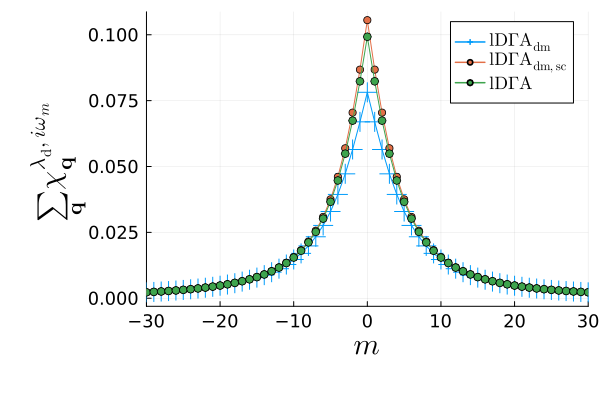

In [27]:

p = plot(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_tc_eom.λd), 1)[1,:], markershape=:auto, markersize=10, xlims=(-30,30),
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}", xlabel=L"m", ylabel=L"\sum_{\mathbf{q}}\chi^{\lambda_\mathrm{d},i\omega_m}_\mathbf{q}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_sc_tc_eom.λd), 1)[1,:], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, 0.0), 1)[1,:], markershape=:octagon, label=L"\mathrm{lD}\Gamma\mathrm{A}")
savefig("chi_d_dm_sc_n1.0_tc_eom.pdf")
display(p)

In [35]:
function lin_extrap_im(Σ_ladder::OffsetMatrix, β::Float64)
    m = ((imag(Σ_ladder[:,1]) .- imag(Σ_ladder[:,0])) ./ ((2*1+1)*π/β - (2*0+1)*π/β))
    imag(Σ_ladder[:,0]) .-  m .* (π/β)
end

function lin_extrap_re(Σ_ladder::OffsetMatrix, β::Float64)
    m = ((real(Σ_ladder[:,1]) .- real(Σ_ladder[:,0])) ./ ((2*1+1)*π/β - (2*0+1)*π/β))
    real(Σ_ladder[:,0]) .-  m .* (π/β)
end

function get0_im(Σ_ladder::OffsetMatrix, β::Float64)
    imag(Σ_ladder[:,0])
end

function get0_re(Σ_ladder::OffsetMatrix, β::Float64)
    real(Σ_ladder[:,0])
end

function get_Z(Σ_ladder::OffsetMatrix, β::Float64)
    m = ((imag(Σ_ladder[:,1]) .- imag(Σ_ladder[:,0])) ./ ((2*1+1)*π/β - (2*0+1)*π/β))
    Z = 1 ./ (1 .- m)
end

xr = collect(LinRange(-π, π, lDGAhelper.kG.Ns));

In [38]:
ef_dm_tc_eom, rc_dm_tc_eom = estimate_connected_ef(res_dm_tc_eom.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
ef_dm_tc_eom = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_tc_eom.parent))
ef_dm_sc_tc_eom, rc_dm_sc_tc_eom = estimate_connected_ef(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
ef_dm_sc_tc_eom = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_sc_tc_eom.parent))
ef_dm_tc_full, rc_dm_tc_full = estimate_connected_ef(res_dm.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
ef_dm_tc_full = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_tc_full.parent))
ef_dm_sc_tc_full, rc_dm_sc_tc_full = estimate_connected_ef(res_dm_sc.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
ef_dm_sc_tc_full = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_sc_tc_full.parent));
#ef_dm_tc_step, rc_dm_tc_step = estimate_connected_ef(res_dm_step.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
#ef_dm_tc_step = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_tc_step.parent))
#ef_dm_sc_tc_step, rc_dm_sc_tc_step = estimate_connected_ef(res_dm_sc_step.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
#ef_dm_sc_tc_step = LadderDGA.expandKArr(lDGAhelper.kG, convert.(Float64, ef_dm_sc_tc_step.parent));

In [ ]:
using CairoMakie
fig = Figure(fontsize = 24, size=(800,1150))
ax1 = Axis(fig[1, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, EoM)}")
hm  = CairoMakie.heatmap!(ax1, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), colormap = :Spectral)
CairoMakie.contour!(ax1, xr,xr,ef_dm_sc_tc_eom, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax1, grid = false)

ax2 = Axis(fig[1, 2],aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(EoM)}")
hm2  = CairoMakie.heatmap!(ax2, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent),  colormap = :Spectral)
CairoMakie.contour!(ax2, xr,xr, ef_dm_tc_eom, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax2, grid = false)
hideydecorations!(ax2, grid = false)
linkyaxes!(ax1, ax2)

ax3 = Axis(fig[2, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Full)}")
hm3  = CairoMakie.heatmap!(ax3, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc.Σ_ladder, lDGAhelper.mP.β).parent), colormap = :Spectral)
CairoMakie.contour!(ax3, xr,xr,ef_dm_sc_tc_full, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax3, grid = false)
ax4 = Axis(fig[2, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Full)}")
hm4  = CairoMakie.heatmap!(ax4, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm.Σ_ladder, lDGAhelper.mP.β).parent), colormap = :Spectral)
CairoMakie.contour!(ax4, xr,xr,ef_dm_tc_full, color = :black, levels = 1,linewidth=2)
hidexdecorations!(ax4, grid = false)
hideydecorations!(ax4, grid = false)
#=
ax5 = Axis(fig[3, 1], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(sc, Step\{0.7\})}")
hm  = CairoMakie.heatmap!(ax5, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_step.Σ_ladder, lDGAhelper.mP.β).parent),  colormap = :Spectral)
CairoMakie.contour!(ax5, xr,xr,ef_dm_sc_tc_step, color = :black, levels = 1,linewidth=2)
ax6 = Axis(fig[3, 2], aspect = 1, xlabel = L"\mathbf{k}_x", ylabel = L"\mathbf{k}_y")#, title=L"Z_\mathbf{k}\;\mathrm{(Step\{0.7\})}")
hm6  = CairoMakie.heatmap!(ax6, xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_step.Σ_ladder, lDGAhelper.mP.β).parent), colormap = :Spectral)
CairoMakie.contour!(ax6, xr,xr,ef_dm_tc_step, color = :black, levels = 1,linewidth=2)
hideydecorations!(ax6, grid = false)
resize_to_layout!(fig)
=#
Label(fig[-1,:], text=L" Z_\mathbf{k}", fontsize=30)
Label(fig[0, 1], text = "SC", fontsize = 20)
Label(fig[0, 2], text = "Direct", fontsize = 20)
Label(fig[1, 0], text = "EoM", fontsize = 20)
Label(fig[2, 0], text = "Full", fontsize = 20)
Label(fig[3, 0], text = "Step", fontsize = 20)
colsize!(fig.layout, 0, Relative(0.05))
colsize!(fig.layout, 1, Relative(0.475))
colsize!(fig.layout, 2, Relative(0.475))
rowsize!(fig.layout, -1, Relative(0.05))
rowsize!(fig.layout, 0, Relative(0.05))
rowsize!(fig.layout, 1, Relative(0.3))
rowsize!(fig.layout, 2, Relative(0.3))
rowsize!(fig.layout, 3, Relative(0.3))
#savefig("ImSig_all.pdf")
fig

In [ ]:

p_re_sc_tc_eom = heatmap(xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_re(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_im_sc_tc_eom = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_re_tc_eom = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_re(res_dm_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]")
p_im_tc_eom = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, lin_extrap_im(res_dm_tc_eom.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]")
plot(p_re_sc_tc_eom, p_im_sc_tc_eom, p_re_tc_eom, p_im_tc_eom)

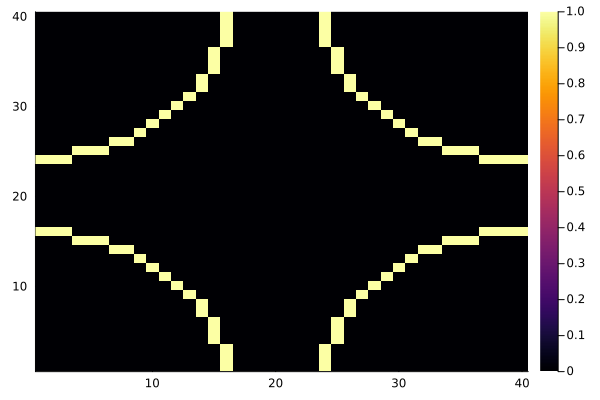

In [51]:
ef, rc = estimate_connected_ef(res_dm_tc_eom.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
heatmap(LadderDGA.expandKArr(lDGAhelper.kG,convert.(Float64,ef.parent)))

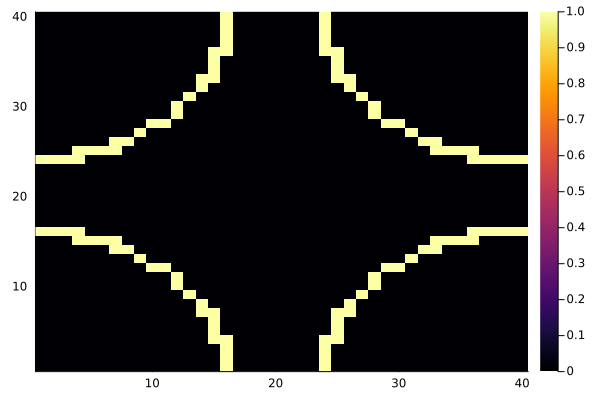

In [52]:
ef, rc = estimate_connected_ef(res_dm_sc_tc_eom.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
heatmap(LadderDGA.expandKArr(lDGAhelper.kG,convert.(Float64,ef.parent)))

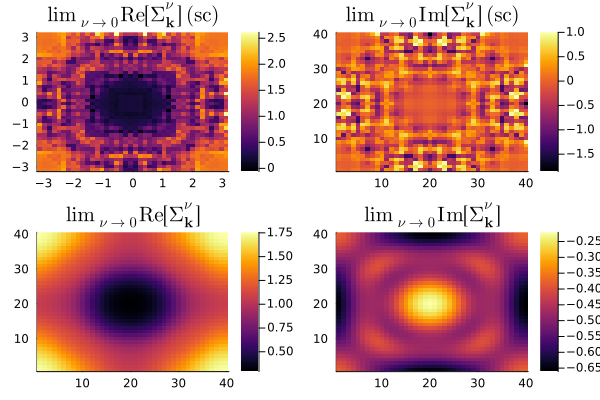

In [27]:
xr = collect(LinRange(-π, π, 40))
p_re_sc_tc_full = heatmap(xr,xr,LadderDGA.expandKArr(lDGAhelper.kG, get0_re(res_dm_sc.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_im_sc_tc_full = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, get0_im(res_dm_sc.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]\;\mathrm{(sc)}")
p_re_tc_full = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, get0_re(res_dm.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Re}[\Sigma^\nu_\mathbf{k}]")
p_im_tc_full = heatmap(LadderDGA.expandKArr(lDGAhelper.kG, get0_im(res_dm.Σ_ladder, lDGAhelper.mP.β).parent), title=L"\lim_{\nu \to 0} \mathrm{Im}[\Sigma^\nu_\mathbf{k}]")
plot(p_re_sc_tc_full, p_im_sc_tc_full, p_re_tc_full, p_im_tc_full)

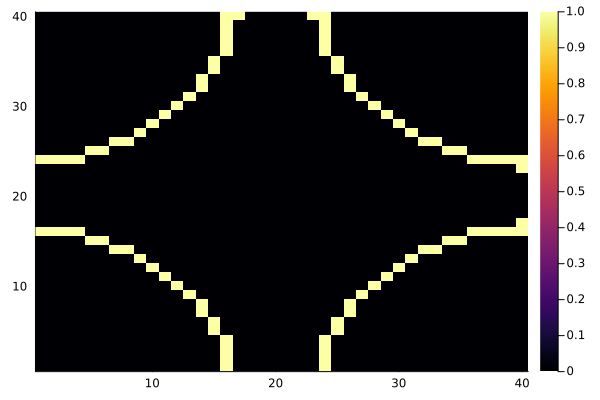

In [54]:
ef, rc = estimate_connected_ef(res_dm.Σ_ladder, lDGAhelper.kG, res_dm.μ, lDGAhelper.mP.β)
heatmap(LadderDGA.expandKArr(lDGAhelper.kG,convert.(Float64,ef.parent)))

In [ ]:
res_dm_sc_tc_eom

In [ ]:
res_dm_tc_eom

In [ ]:
res_dm_sc

In [ ]:
res_dm

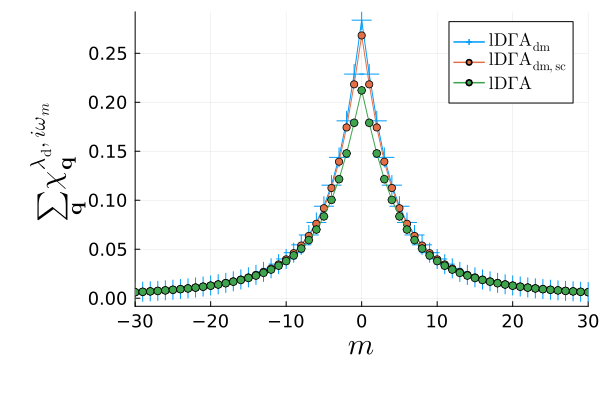

In [78]:
p40n083 = plot(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm40.λd), 1)[1,:], markershape=:auto, markersize=10, xlims=(-30,30),
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, left_margin = 10mm, bottom_margin=10mm,
    label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm}}", xlabel=L"m", ylabel=L"\sum_{\mathbf{q}}\chi^{\lambda_\mathrm{d},i\omega_m}_\mathbf{q}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, res_dm_sc40.λd), 1)[1,:], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_{\mathrm{dm,sc}}")
plot!(-150:150, kintegrate(lDGAhelper.kG, χ_λ(χd, 0.0), 1)[1,:], markershape=:octagon, label=L"\mathrm{lD}\Gamma\mathrm{A}")
savefig("chi_d_dm_sc_n0.83.pdf")
display(p40n083)

In [12]:
done = false

wp, mP, sP, env, kGridsStr = readConfig(cfg_file);
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env, silent=false);
bubble_i = nothing
χm_i = nothing
χd_i = nothing
γm_i = nothing
γd_i = nothing
GLoc_fft_i  = lDGAhelper.gLoc_fft
GLoc_rfft_i = lDGAhelper.gLoc_rfft
GLoc_fft_bak = nothing

i = 1
while !done
    bubble_i     = calc_bubble(:DMFT, GLoc_fft_i, GLoc_rfft_i, lDGAhelper.kG, lDGAhelper.mP, lDGAhelper.sP);
    χm_i, γm_i = calc_χγ(:m, lDGAhelper, bubble_i);
    χd_i, γd_i = calc_χγ(:d, lDGAhelper, bubble_i);
    λ₀_i = calc_λ0(bubble_i, lDGAhelper);
    res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm_i, γm_i, χd_i, γd_i, λ₀_i, lDGAhelper; tc=ΣTail_ExpStep{0.3})
    display(res_dm)
    GLoc_fft_bak = deepcopy(GLoc_fft_i)
    GLoc_fft_i, GLoc_rfft_i = G_fft(res_dm.G_ladder, lDGAhelper.kG, lDGAhelper.sP)
    if i > i
        ΔG = sum(abs.(GLoc_fft_i .- GLoc_fft_bak))
        println("[it=$i] ΔG = ", ΔG)
        ΔG < 1e-10 && (done = true)
    end
    i += 1
end

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10
┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.4356, χLoc_d(1:301) = 0.0644
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.24860048983264754 ?=? 0.2500077791504396 ?≈? 0.25000777915043954 ≟ 0.24999903238559407"
│ Local EoM check for the first 5 frequencies: 0.0001, 0.0002, 0.0002, 0.0003, 0.0003  
└     


DBG: NOT using diagonal terms in λ₀


[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.001142716936 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.00070090836 ≟ 0


DBG: NOT using diagonal terms in λ₀


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.05317304, λd = 2.35284571, μ = 0.98568446                            │
│  n      =  0.99803265,  n DMFT  =  0.99803265,  Δ = 0.0000%                  │
│  PP_1   =  0.24999903,  PP_2    =  0.24999903,  Δ = 0.0000%                  │
│  Epot_1 =  0.11227092,  Epot_2  =  0.11227092,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.21629635,  Ekin_2  = -0.20903607,  Δ = 1.7070%                 │
│  χ_m    =  0.44288087,  χ_m_loc = 0.43558908,  Δ = 0.8301%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
[ Info: m channel: |∑χ(q=0,ω≠0)| = 1.324441128817 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.864247890386 ≟ 0


DBG: NOT using diagonal terms in λ₀


LoadError: ArgumentError: range(16.490175733977157, stop=5.0, length=-114): negative length